# taq_cross_response_data

#### Juan Camilo Henao Londono - 22.02.2019
#### AG Guhr - Universitaet Duisburg-Essen

In the following [link]() can be seen the plot of the function's results

In [1]:
# Modules

import numpy as np
import os

import pickle

import taq_data_tools

__tau__ = 1000

In [42]:
def taq_cross_response_data(ticker_i, ticker_j, year, month, day):
    """
    Obtain the cross response function using the midpoint log returns of
    ticker i and trade signs of ticker j during different time lags. The data
    is adjusted to use only the values each second
        :param ticker_i: string of the abbreviation of the midpoint stock to
         be analized (i.e. 'AAPL')
        :param ticker_j: string of the abbreviation of the trade sign stock to
         be analized (i.e. 'AAPL')
        :param year: string of the year to be analized (i.e '2016')
        :param month: string of the month to be analized (i.e '07')
        :param day: string of the day to be analized (i.e '07')
    """
    if (ticker_i == ticker_j):

        return None

    else:

        function_name = taq_cross_response_data.__name__
        taq_data_tools.taq_function_header_print_data(function_name, ticker_i,
                                                      ticker_j, year, month,
                                                      day)

        # Load data
        midpoint_i = pickle.load(open(''.join((
                '../taq_data_{1}/taq_midpoint_data/taq_midpoint_data'
                + '_midpoint_{1}{2}{3}_{0}.pickle').split())
                .format(ticker_i, year, month, day), 'rb'))
        trade_sign_j = pickle.load(open("".join((
                '../taq_data_{1}/taq_trade_signs_data/taq_trade_signs'
                + '_data_{1}{2}{3}_{0}.pickle').split())
                .format(ticker_j, year, month, day), 'rb'))
        time = pickle.load(open(''.join((
                '../taq_data_{}/taq_midpoint_data/taq_midpoint_data'
                + '_time.pickle').split())
                .format(year), 'rb'))

        # Setting variables to work with t_step ms accuracy

        # Array of the average of each tau. 10^3 s used by Wang
        cross_response_tau = np.zeros(__tau__)

        # Calculating the midpoint log return and the cross response function

        # Depending on the ta
        for tau_idx in range(__tau__):

            # Obtain the midpoint log return. Displace the numerator tau
            # values to the right and compute the return, and append the
            # remaining values of tau with zeros
                        
            log_return_i_sec = np.append(np.log(
                midpoint_i[tau_idx + 1:]/midpoint_i[:-tau_idx - 1]),
                np.zeros(tau_idx + 1))

            cross_response_tau[tau_idx] = np.mean(
                log_return_i_sec[trade_sign_j != 0] *
                trade_sign_j[trade_sign_j != 0])

        # Saving data

        taq_data_tools.taq_save_data(function_name, cross_response_tau,
                                       ticker_i, ticker_j, year, month, day)

        return cross_response_tau

In [43]:
# Test

ticker_i = 'AAPL'
ticker_j = 'MSFT'
year = '2008'
month = '03'
days = ['10', '11', '12', '13', '14']

for day in days:
    taq_cross_response_data(ticker_i, ticker_j, year, month, day)

TAQ data
taq_cross_response_data
Processing data for the stock i AAPL and stock j MSFT the 2008.03.10
Data Saved

TAQ data
taq_cross_response_data
Processing data for the stock i AAPL and stock j MSFT the 2008.03.11
Data Saved

TAQ data
taq_cross_response_data
Processing data for the stock i AAPL and stock j MSFT the 2008.03.12
Data Saved

TAQ data
taq_cross_response_data
Processing data for the stock i AAPL and stock j MSFT the 2008.03.13
Data Saved

TAQ data
taq_cross_response_data
Processing data for the stock i AAPL and stock j MSFT the 2008.03.14
Data Saved



TAQ data
taq_cross_response_data
Processing data for the stock i AAPL and stock j MSFT the 2008.03.10
Data Saved



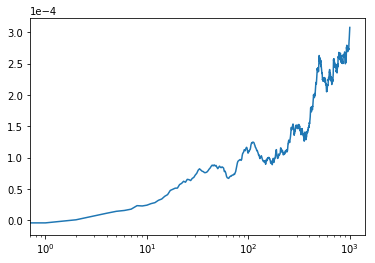

In [47]:
aa = taq_cross_response_data(ticker_i, ticker_j, year, month, '10')
from matplotlib import pyplot as plt
plt.semilogx(-aa)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))